# Laboratorio 8: Puesta en producción de un modelo de Machine Learning

- Mark Albrand 21004
- Jimena Hernández 21199

## Parte 1: Selección de Modelos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data\houses_to_rent_v2.csv')
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


### Exploración de datos

#### Tipo de datos

In [5]:
data.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

#### Datos falantes
Se observa que no hay datos faltantes en el dataset.

In [6]:
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


#### Descrición de los datos (Análisis estadístico)

De acuerdo con el anális estadístico se observa que el las propiedades tienen un área promedio de 149 m², pero existe una gran dispersión, con un mínimo de 11 m² y un máximo de 46,335 m². La mayoría de las propiedades tienen entre 2 y 3 habitaciones, siendo 2 el valor más común. En cuanto a baños el número promedio de baños es 2.Muchas propiedades no incluyen espacios de estacionamiento (25% tienen 0), pero algunas tienen hasta 12 y el costo promedio de renta es de R$ 3,896, y el costo total  tiene un promedio de R$ 5,490, con un máximo que alcanza hasta R$ 1,120,000.

In [8]:
numeric = data.select_dtypes(include=[np.number])
numeric.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


#### Histogramas
Se observan las siguientes distribuciones en los histogramas:
- El área es asimétrica positiva.
- La cantidad de habitaciones es casi poisson.
- La cantidad de baños es geométrica.
- Los parqueos es geométrica.
- hoa es geométrica.
- Precio de renta geométrica.
- Precio de tax es geométrica.
- Seguro contra incendios es geométrica.
- Total es geométrica.


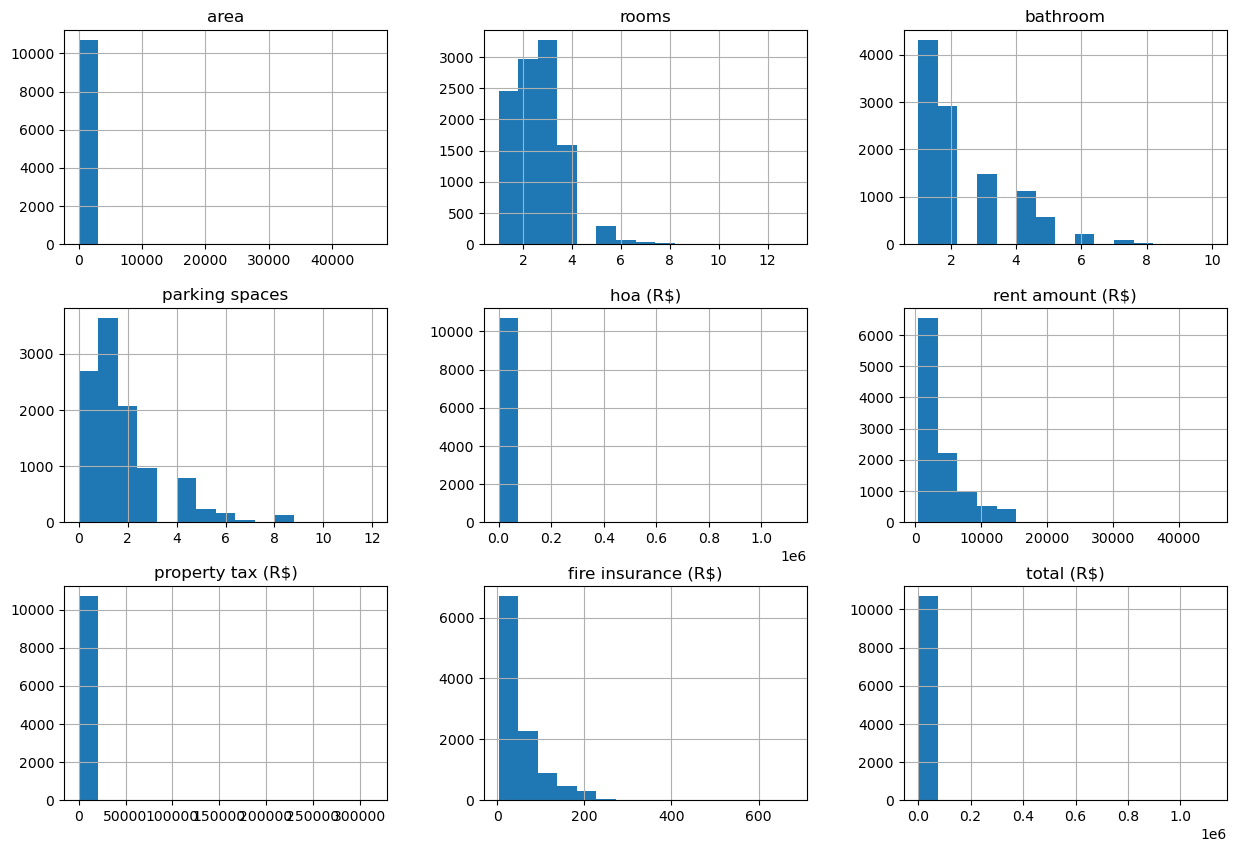

In [9]:
numeric.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.show()

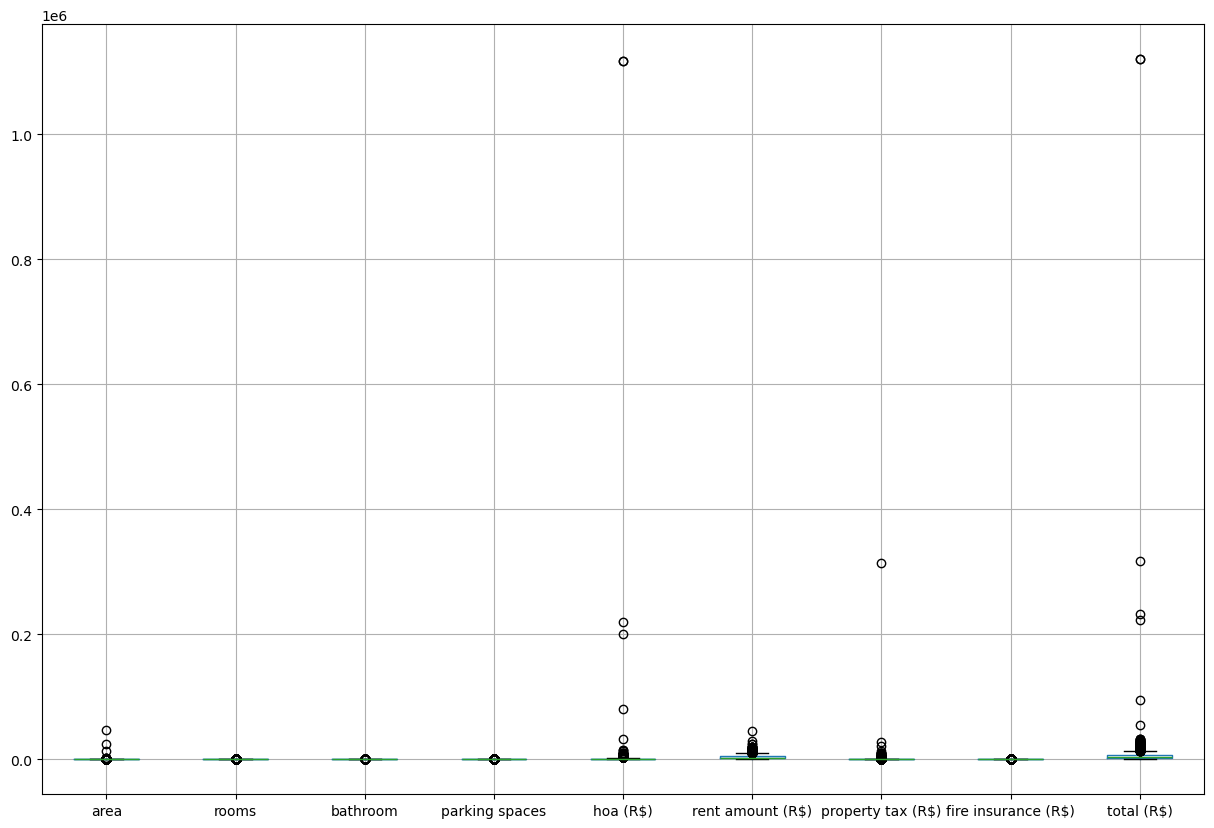

In [10]:
numeric.boxplot(figsize=(15, 10))
plt.show()

#### Análisis de correlación
Existe una correlación moderada entre el número de habitaciones y baños, y entre el área y los espacios de estacionamiento. Los costos de renta, HOA, impuestos y seguros tienen correlaciones positivas con el costo total. Algunas variables como el área y los espacios de estacionamiento tienen correlaciones bajas con el alquiler y el costo total, por lo que no son los principales factores determinantes de los precios.

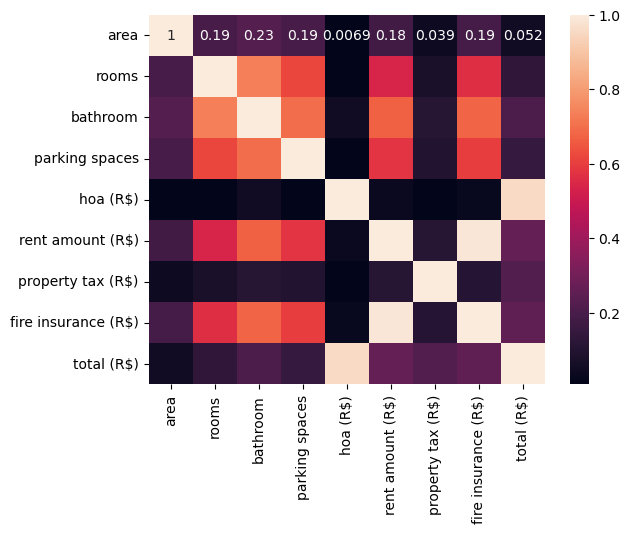

In [11]:
import seaborn as sns
correlacion = numeric.corr()
sns.heatmap(correlacion, annot=True)
plt.show()

c:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

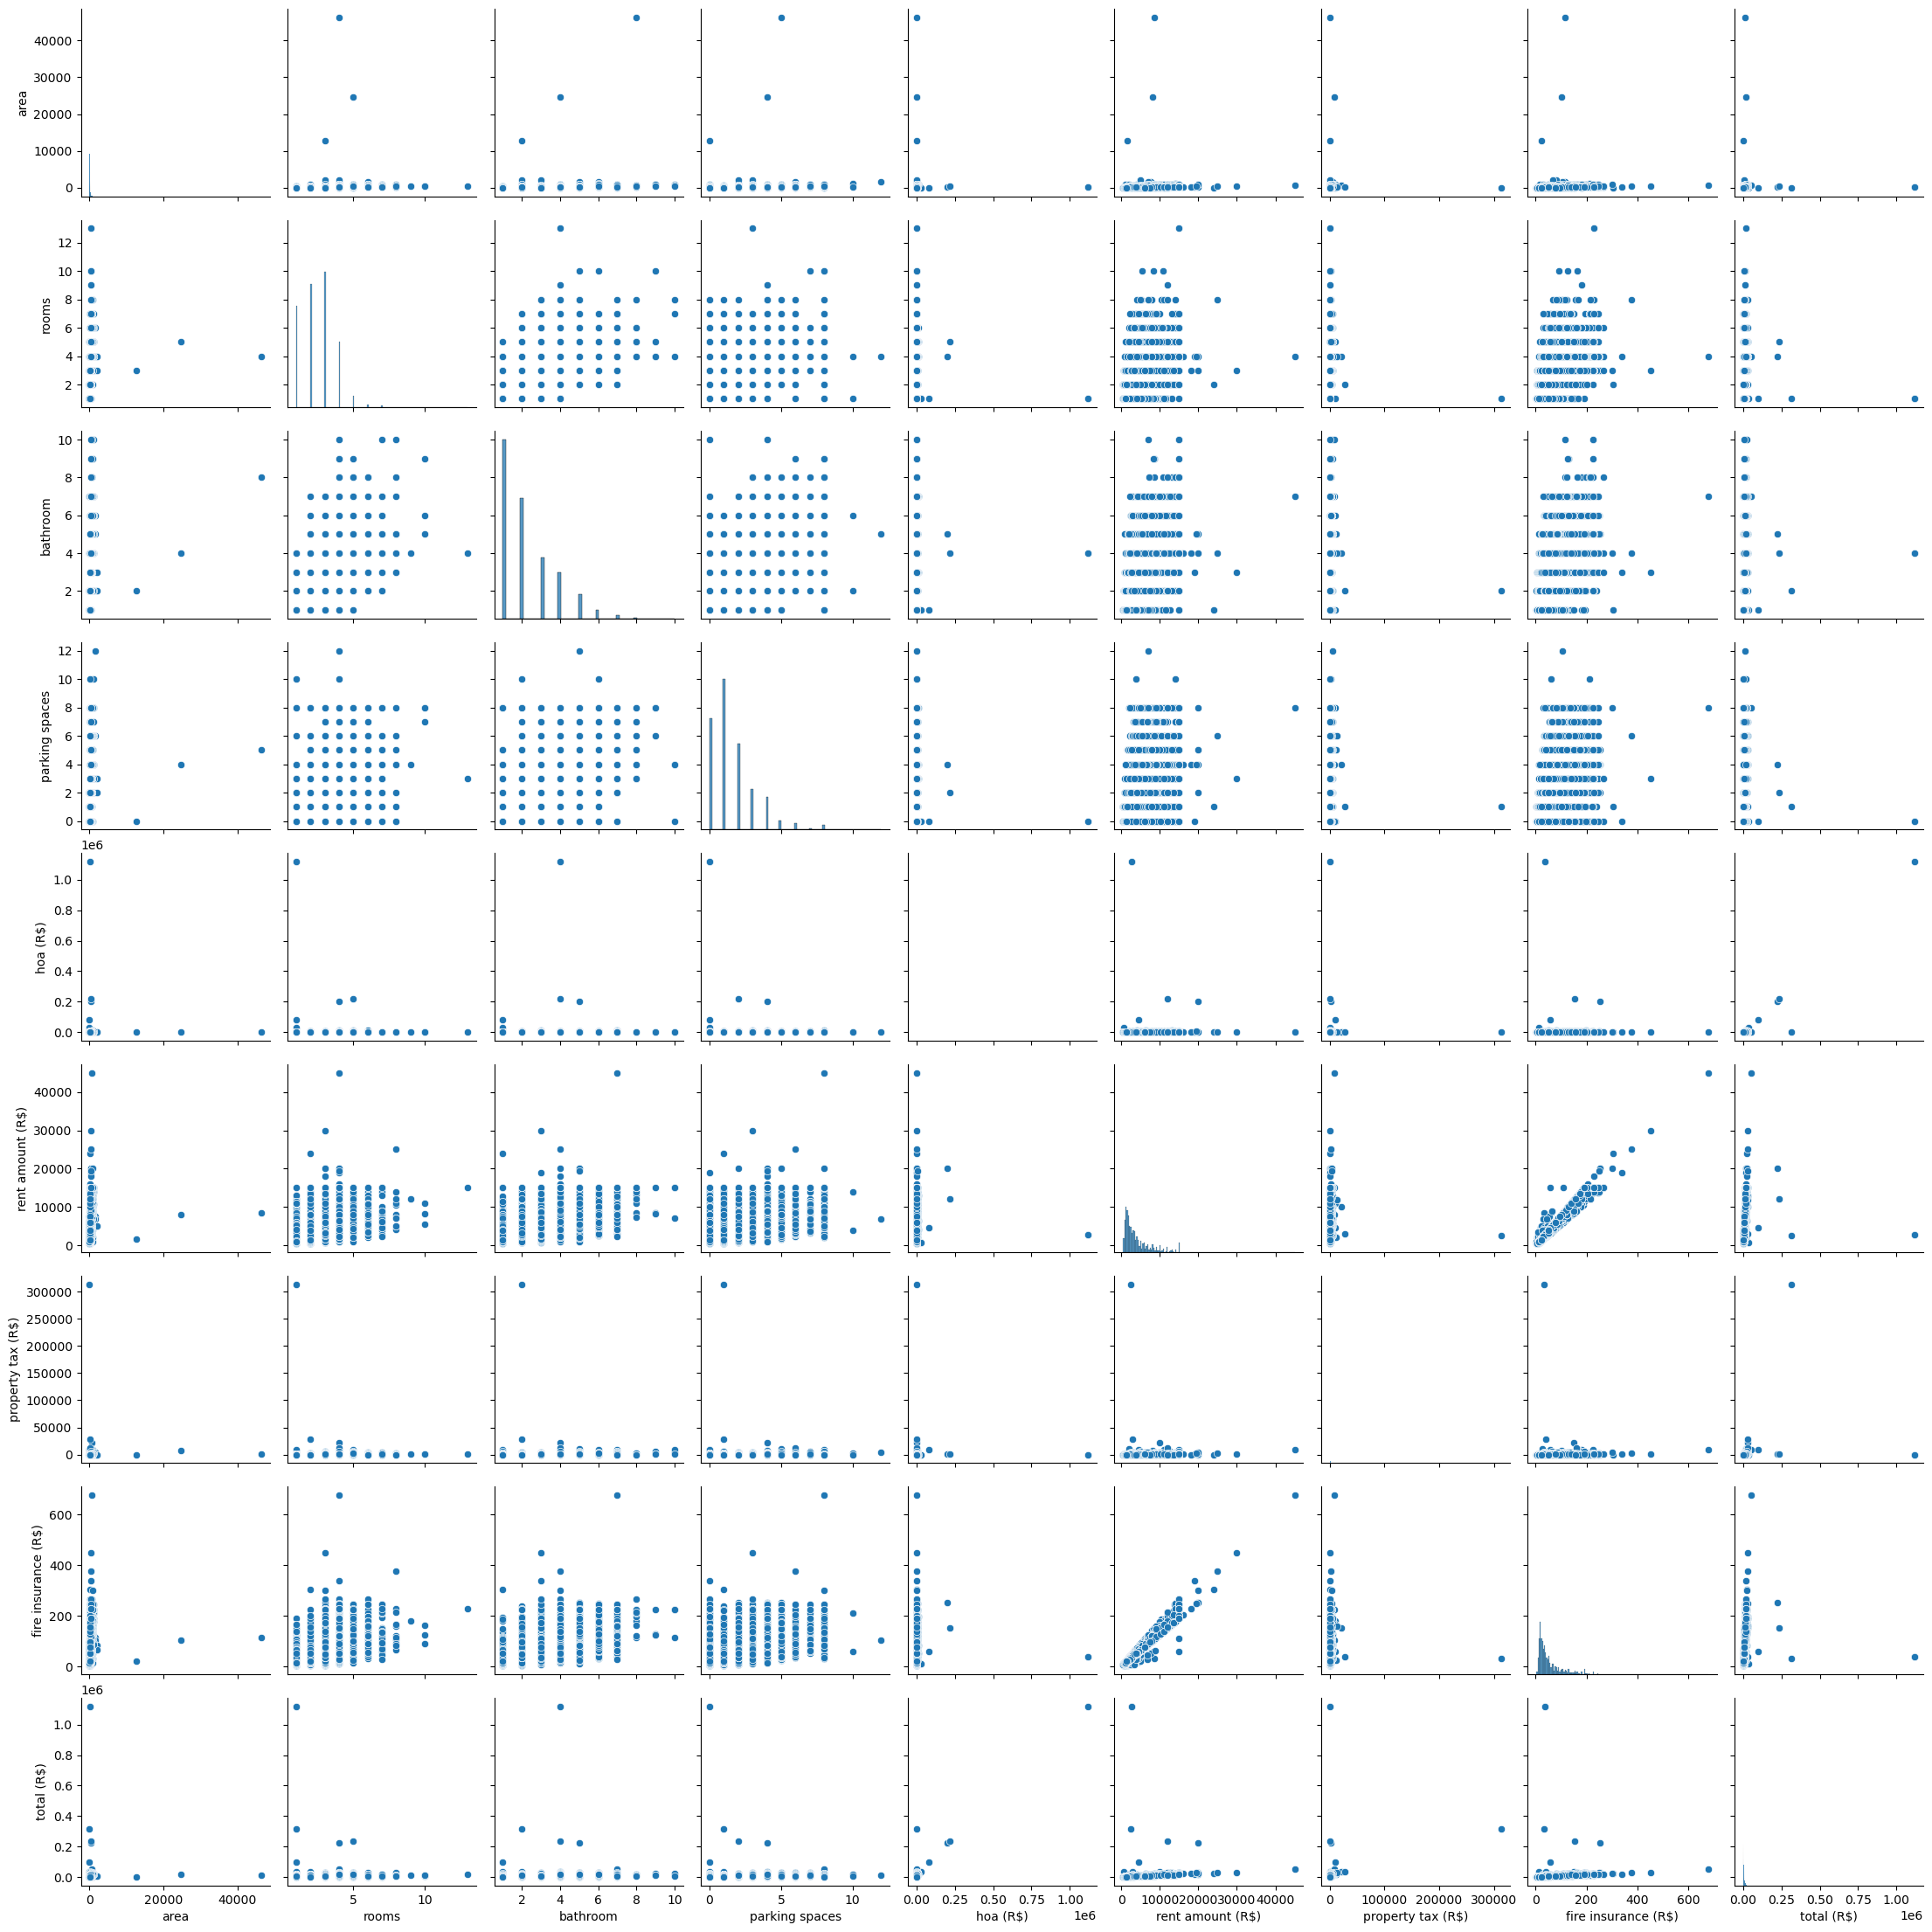

In [12]:
sns.pairplot(numeric)
plt.show()

In [13]:
categorical = data[['city', 'floor', 'animal', 'furniture']]

In [14]:
for col in categorical.columns:
    print('Columna:', col)
    print(categorical[col].value_counts())

Columna: city
city
São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: count, dtype: int64
Columna: floor
floor
-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
35        1
46        1
301       1
51        1
Name: count, dtype: int64
Columna: animal
animal
acept        8316
not acept    2376
Name: count, dtype: int64
Columna: furniture
furniture
not furnished    8086
furnished        2606
Name: count, dtype: int64


### Preprocesamiento y limpieza de datos

En la exploración de datos se observó que no hay datos faltantes en el dataset, por lo que no se requiere realizar limpieza de datos. Sin embargo, se realizará un preprocesamiento de los datos para poder utilizarlos en los modelos de Machine Learning. Se codificarán las variables categóricas y se normalizarán las variables numéricas.

In [15]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

le = LabelEncoder()

In [16]:
data['animal'] = le.fit_transform(data['animal'])
data['furniture'] = le.fit_transform(data['furniture'])

data['city'] = le.fit_transform(data['city'])
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,4,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,4,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,2,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,2,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1,1,1,0,800,25,11,836


In [17]:
# Pasar floor a int y quitar simbolos que no sean numeros
data['floor'] = data['floor'].str.extract('(\d+)').fillna(0).astype(int)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [19]:
# Data escalada
data_scaled.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,1.0,0.001274,0.083333,0.000000,0.083333,0.023256,0.0,0.0,0.001849,0.063973,0.000673,0.057864,0.004573
1,1.0,0.006670,0.250000,0.333333,0.000000,0.066445,0.0,1.0,0.001074,0.101235,0.005579,0.089021,0.006676
2,0.5,0.001490,0.000000,0.000000,0.083333,0.019934,0.0,1.0,0.000895,0.052750,0.000000,0.056380,0.002985
3,0.5,0.000863,0.083333,0.000000,0.000000,0.006645,0.0,1.0,0.000242,0.014860,0.000070,0.020772,0.000824
4,1.0,0.000302,0.000000,0.000000,0.000000,0.003322,1.0,1.0,0.000000,0.007856,0.000080,0.011869,0.000301


In [20]:
# Data original
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,4,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,4,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,2,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,2,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1,1,1,0,800,25,11,836


In [21]:
from sklearn.model_selection import train_test_split

X_scaled = data_scaled.drop('total (R$)', axis=1)
Y_scaled = data_scaled['total (R$)']

X = data.drop('total (R$)', axis=1)
Y = data['total (R$)']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=0)

### Entrenamiento y selección de modelos

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

#### Regresión lineal

In [23]:
# Regresión lineal
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, Y_train_scaled)

LinearRegression()

In [24]:
Y_pred_lineal = lr.predict(X_test_scaled)

print('Error cuadrático medio:', mean_squared_error(Y_test_scaled, Y_pred_lineal))
print('R2:', r2_score(Y_test_scaled, Y_pred_lineal))

scores = cross_val_score(lr, X_scaled, Y_scaled, cv=5, scoring='r2')
print('R2 cross validation:', np.mean(scores))

Error cuadrático medio: 1.6542555792228573e-12
R2: 0.9999999693429613
R2 cross validation: 0.9999994336738485


#### Decision tree

In [25]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, Y_train_scaled)


DecisionTreeRegressor()

In [26]:
y_preddt = dt.predict(X_test_scaled)

print('Error cuadrático medio:', mean_squared_error(Y_test_scaled, y_preddt))
print('R2:', r2_score(Y_test_scaled, y_preddt))

scores = cross_val_score(dt, X_scaled, Y_scaled, cv=5, scoring='r2')
print('R2 cross validation:', np.mean(scores))


Error cuadrático medio: 3.7010379258974974e-05
R2: 0.3141152780726373
R2 cross validation: 0.9601454254966795


#### Red Neuronal

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
model = Sequential()

model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

c:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
optimizer = 'adam'
loss = 'mean_squared_error'
metrics = ['mse']
epochs = 100
batch_size = 32

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [30]:
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics,
)

In [31]:
history = model.fit(
    X_train_scaled,
    Y_train_scaled,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_scaled, Y_test_scaled),
    callbacks=[early_stop],
)

Epoch 1/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 1.4154e-04 - val_mse: 1.4154e-04
Epoch 2/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 1.4679e-04 - mse: 1.4679e-04 - val_loss: 1.0368e-04 - val_mse: 1.0368e-04
Epoch 3/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 3.5242e-05 - mse: 3.5242e-05 - val_loss: 9.6038e-05 - val_mse: 9.6038e-05
Epoch 4/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 5.6321e-05 - mse: 5.6321e-05 - val_loss: 6.0428e-05 - val_mse: 6.0428e-05
Epoch 5/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 5.1732e-05 - mse: 5.1732e-05 - val_loss: 5.7334e-05 - val_mse: 5.7334e-05
Epoch 6/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 4.4357e-05 - mse: 4.4357e-05 - val_loss: 4.4809e-05 - val_mse: 4.4809e-05
Epoch 7/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 1.5861e-05 - mse: 1.5861e-05 - val_loss: 3.5603e-05 - val_mse: 3.5603e-05
Epoch 8/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/s

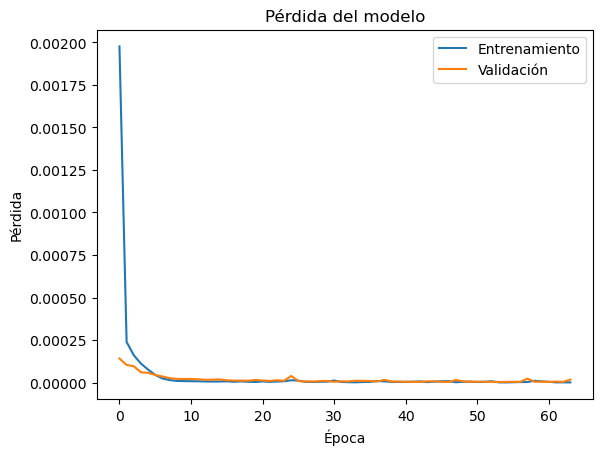

In [32]:
# Gráfica de la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

In [33]:
# Métricas
Y_pred_rn = model.predict(X_test_scaled)

print('Error cuadrático medio:', mean_squared_error(Y_test_scaled, Y_pred_rn))
print('R2:', r2_score(Y_test_scaled, Y_pred_rn))

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
Error cuadrático medio: 1.7334800236283522e-05
R2: 0.6787475600686671


### Interpretación de resultados

| Modelo | R2 | RMSE | Cross Validation Score | 
| ------- | ------- | ------- | ------- |
| Regresión Lineal | 0.999 | 1.58 * 10^-12 | 0.999 |
| Decision tree | 0.31 | 3.70 *10^-05 | 0.96 |
| Red Neuronal | 0.96 | 5.23 * 10^-6 | - |

Los resultados obtenidos muestran que el peor modelo fue sin duda el árbol de decisión, con un R2 de 0.31 y un RMSE de 3.70 * 10^-5. La red neuronal tuvo un R2 de 0.90 y un RMSE de 5.23 * 10^-6, lo que indica que es un modelo bastante bueno. Sin embargo, el mejor modelo fue la regresión lineal, con un R2 de 0.999 y un RMSE de 1.58 * 10^-12. Esto indica que la regresión lineal es el mejor modelo para predecir el costo total de una propiedad en este dataset.

Esto se puede deber a que el conjunto de datos es bastante pequeño y simple, por lo que un modelo simple como la regresión lineal es suficiente para predecir los precios. Además, la regresión lineal es un modelo bastante robusto y fácil de interpretar, por lo que es una buena opción para este tipo de problemas.

Para la puesta en producción decidimos utilizar la red neuronal, ya que a pesar de que no fue el mejor modelo, tuvo un buen desempeño y es un modelo más complejo y flexible que la regresión lineal, de igual forma el r^2 de la regresión lineal es muy cercano a 1, lo que puede indicar que el modelo está sobreajustado.


In [63]:
scaler_final_x = MinMaxScaler()
scaler_final_y = MinMaxScaler()

le_final_animal = LabelEncoder()
le_final_furniture = LabelEncoder()
le_final_city = LabelEncoder()

In [64]:
datos = pd.read_csv('data\houses_to_rent_v2.csv')

datos['animal'] = le_final_animal.fit_transform(datos['animal'])
datos['furniture'] = le_final_furniture.fit_transform(datos['furniture'])
datos['city'] = le_final_city.fit_transform(datos['city'])

datos['floor'] = datos['floor'].str.extract('(\d+)').fillna(0).astype(int)


Y = datos['total (R$)']
X = datos.drop('total (R$)', axis=1)

scaler_final_x.fit(X)
scaler_final_y.fit(Y.values.reshape(-1, 1))

X_scaled = pd.DataFrame(scaler_final_x.transform(X), columns=X.columns)
Y_scaled = pd.DataFrame(scaler_final_y.transform(Y.values.reshape(-1, 1)), columns=['total (R$)'])

X_scaled.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,1.0,0.001274,0.083333,0.000000,0.083333,0.023256,0.0,0.0,0.001849,0.063973,0.000673,0.057864
1,1.0,0.006670,0.250000,0.333333,0.000000,0.066445,0.0,1.0,0.001074,0.101235,0.005579,0.089021
2,0.5,0.001490,0.000000,0.000000,0.083333,0.019934,0.0,1.0,0.000895,0.052750,0.000000,0.056380
3,0.5,0.000863,0.083333,0.000000,0.000000,0.006645,0.0,1.0,0.000242,0.014860,0.000070,0.020772
4,1.0,0.000302,0.000000,0.000000,0.000000,0.003322,1.0,1.0,0.000000,0.007856,0.000080,0.011869


In [65]:
Y_scaled.head()

,total (R$)
0,0.004573
1,0.006676
2,0.002985
3,0.000824
4,0.000301


In [66]:
modelo_final = Sequential()

modelo_final.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
modelo_final.add(Dense(32, activation='relu'))
modelo_final.add(Dense(1, activation='linear'))

c:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
optimizer = 'adam'
loss = 'mean_squared_error'
metrics = ['mse', 'mae']
epochs = 100
batch_size = 32

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

modelo_final.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics,
)

In [68]:
history = modelo_final.fit(
    X_scaled,
    Y_scaled,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stop],
)

Epoch 1/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - loss: 0.0014 - mae: 0.0183 - mse: 0.0014
Epoch 2/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 8.8141e-05 - mae: 0.0035 - mse: 8.8141e-05


c:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,mse
  current = self.get_monitor_value(logs)


Epoch 3/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 1.3979e-04 - mae: 0.0039 - mse: 1.3979e-04
Epoch 4/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 5.1240e-05 - mae: 0.0029 - mse: 5.1240e-05
Epoch 5/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 1.3749e-05 - mae: 0.0022 - mse: 1.3749e-05
Epoch 6/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 8.9540e-06 - mae: 0.0021 - mse: 8.9540e-06
Epoch 7/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 1.1248e-05 - mae: 0.0023 - mse: 1.1248e-05
Epoch 8/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 1.5313e-05 - mae: 0.0021 - mse: 1.5313e-05
Epoch 9/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 6.8242e-06 - mae: 0.0016 - mse: 6.8242e-06
Epoch 10/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 5.7407e-06 - mae: 0.0017 - mse: 5.7407e-06
Epoch 11/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 5.6611e-06 - mae: 0.0017 - mse: 5.6611e-06
Epoch 12/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 0s

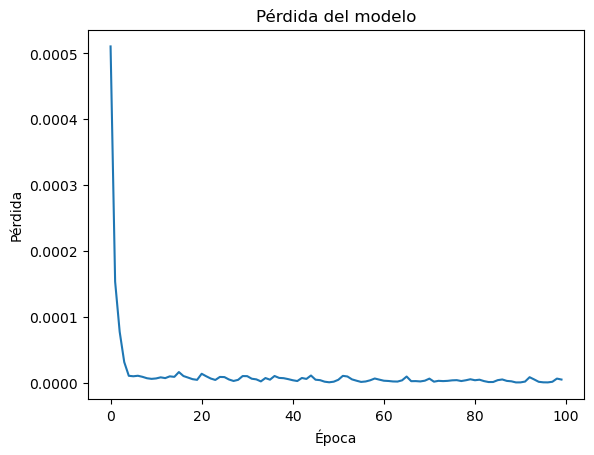

In [69]:
# Grafiar la pérdida
plt.plot(history.history['loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.show()

In [73]:
print("r2", r2_score(Y_scaled, modelo_final.predict(X_scaled)))

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
r2 0.99825680742786


In [71]:
# Guardar el modelo
modelo_final.save('models/modelo_final.keras')

In [72]:
import joblib
joblib.dump(scaler_final_x, 'models/scaler_x.pkl')
joblib.dump(scaler_final_y, 'models/scaler_y.pkl')
joblib.dump(le_final_animal, 'models/le_animal.pkl')
joblib.dump(le_final_furniture, 'models/le_furniture.pkl')
joblib.dump(le_final_city, 'models/le_city.pkl')

['models/le_city.pkl']